# Data Exploration

In [85]:
df = pd.read_csv('Combat_Data.csv', engine = 'python')
display(df.head())
print(df.columns)

,사료 번호,연대,대대,중대,기타소속,년도,월,일,날짜,지역 분류,지역,일본군수,의병수,일본군사상자,의병사망,한국군사망,특이사항,의병 지휘부
0,사료1,51,NaN,11,NaN,1907.0,8.0,20.0,1907-08-20,경기도,여주,NaN,300,1.0,40,,NaN,NaN
1,사료1,51,2대대,5,아다치 지대,1907.0,8.0,22.0,1907-08-22,충청북도,제천,NaN,불명,NaN,3,NaN,NaN,NaN
2,사료1,51,NaN,2,아다치 지대,1907.0,8.0,22.0,1907-08-22,충청북도,충주,NaN,60,NaN,10,20,NaN,NaN
3,사료1,1,NaN,9,충주수비대,1907.0,8.0,23.0,1907-08-23,충청북도,충주,NaN,200,1.0,26,NaN,NaN,NaN
4,사료1,51,NaN,8,요코에 소대,1907.0,8.0,24.0,1907-08-24,충청북도,단양,NaN,15,NaN,1,NaN,NaN,NaN


Index(['사료 번호', '연대', '대대', '중대', '기타소속', '년도', '월', '일', '날짜', '지역 분류', '지역',
       '일본군수', '의병수', '일본군사상자', '의병사망', '한국군사망', '특이사항', '의병 지휘부'],
      dtype='object')


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

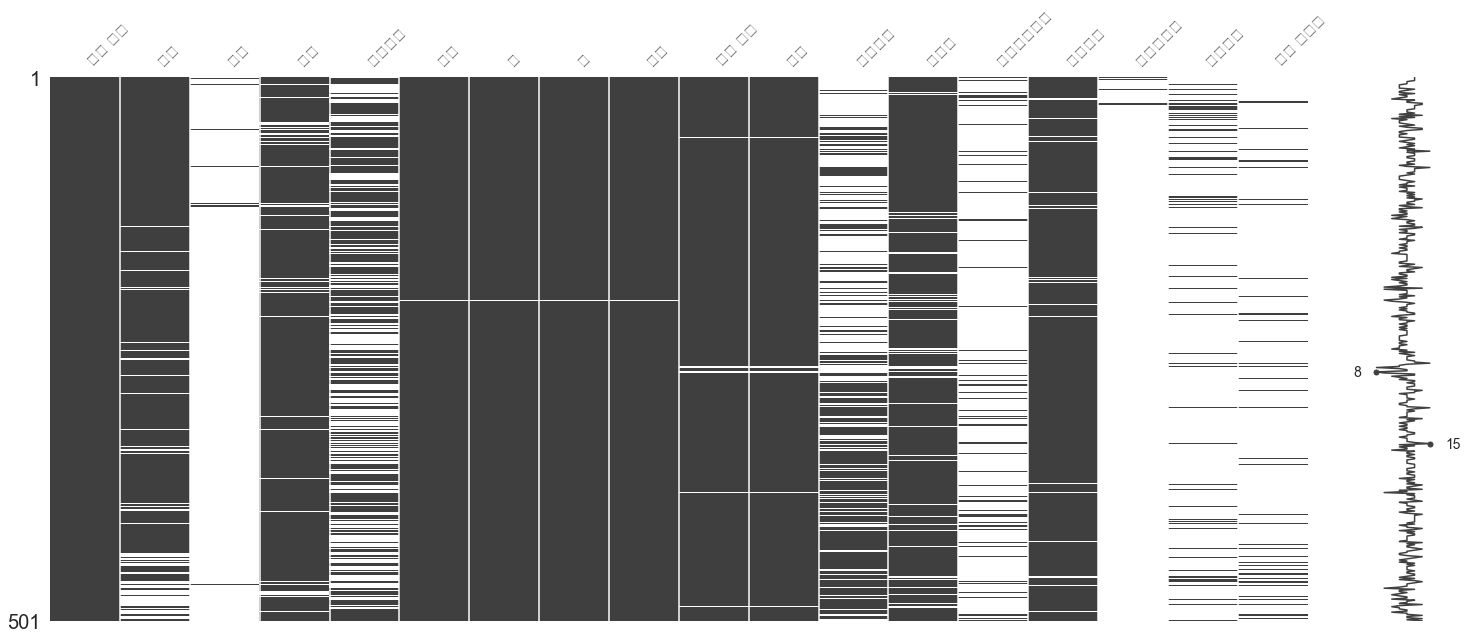

사료 번호       0
연대         59
대대        493
중대         35
기타소속      219
년도          1
월           1
일           1
날짜          1
지역 분류       7
지역          7
일본군수      256
의병수        41
일본군사상자    446
의병사망       19
한국군사망     496
특이사항      443
의병 지휘부    460
dtype: int64


In [86]:
import missingno as msno
#checking if there's any empty values on the chart.

msno.matrix(df)
plt.show()

print(df.isnull().sum()) #결측치 확인

# Data Preprocessing

산발적 전투 사건들을 모아놓은 데이터셋이라고 했으니까 소속이, 특이사항(딱히 일반화할만한 특징이 없더라고)drop.
의병지휘부, 한국군 사망도(결측치가 너무 많아서& 딱히 의미 없는 데이터라)은 drop할게
년도, 월, 일도 결국 날짜에 포함되어 있으니 다 drop.

In [87]:
df1 = df.drop(['사료 번호', '연대', '대대', '중대', '기타소속', '특이사항', '의병 지휘부', '한국군사망', '년도', '월', '일', '일본군수'], axis = 1)
df1.tail()

,날짜,지역 분류,지역,의병수,일본군사상자,의병사망
496,1908-05-19,전라북도,순창,50,NaN,9
497,1908-05-19,전라남도,화순,85,NaN,70
498,1908-05-31,전라남도,장성,71,2.0,70
499,1908-06-04,충청북도,봉화,100,NaN,70
500,1908-06-07,충청북도,봉화,150,2.0,48


결측치 값이 너무 많아서 제대로 분석이 될는지 모르겠는데 일단 날짜나 지역 별로 묶어 볼게. 
지역값도 너무 많아서 도별로만 묶어볼거야.

그전에 일단 일본군사상자 및 의병수, 의병사망  Nan값(결측치)은 전부 0으로 채워넣을거야.(Imputation)

In [88]:
df1['일본군사상자'] = df1['일본군사상자'].fillna(0)
df1['의병수'] = df1['의병수'].fillna(0)
df1['의병사망'] = df1['의병사망'].fillna(0)
df1

,날짜,지역 분류,지역,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,여주,300,1.0,40
1,1907-08-22,충청북도,제천,불명,0.0,3
2,1907-08-22,충청북도,충주,60,0.0,10
3,1907-08-23,충청북도,충주,200,1.0,26
4,1907-08-24,충청북도,단양,15,0.0,1
...,...,...,...,...,...,...
496,1908-05-19,전라북도,순창,50,0.0,9
497,1908-05-19,전라남도,화순,85,0.0,70
498,1908-05-31,전라남도,장성,71,2.0,70
499,1908-06-04,충청북도,봉화,100,0.0,70


In [89]:
df1 = df1.drop('지역', axis = 1)
df1

,날짜,지역 분류,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,300,1.0,40
1,1907-08-22,충청북도,불명,0.0,3
2,1907-08-22,충청북도,60,0.0,10
3,1907-08-23,충청북도,200,1.0,26
4,1907-08-24,충청북도,15,0.0,1
...,...,...,...,...,...
496,1908-05-19,전라북도,50,0.0,9
497,1908-05-19,전라남도,85,0.0,70
498,1908-05-31,전라남도,71,2.0,70
499,1908-06-04,충청북도,100,0.0,70


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

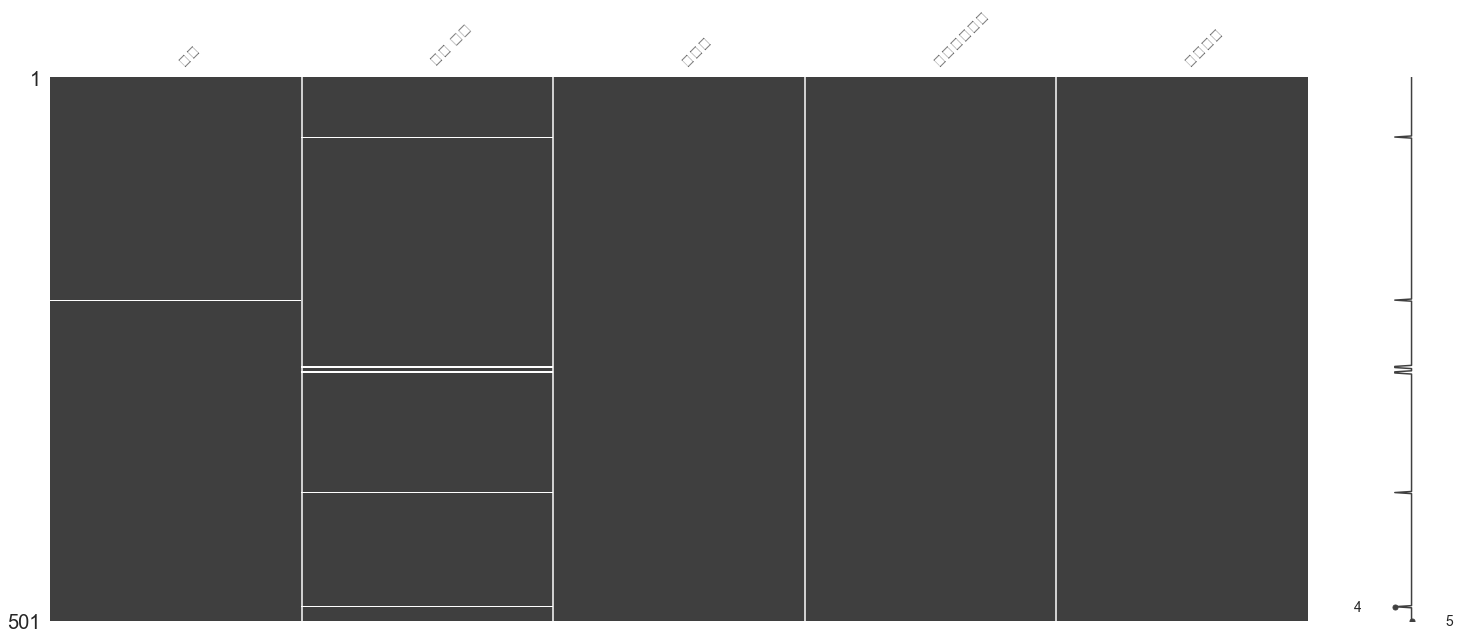

날짜        1
지역 분류     7
의병수       0
일본군사상자    0
의병사망      0
dtype: int64


In [90]:
import missingno as msno
#checking if there's any empty values on the chart.

msno.matrix(df1)
plt.show()

print(df1.isnull().sum()) #결측치 확인

여전히 지역분류, 날짜에는 na값이 있어서 이건 쓸모없는 값이라고 간주하고 행을 drop할거야.
지금까지 전처리한 결과를 보면 결국 지역이나 날짜에 따른 추이만 볼 수 있을거 같은데 결측치가 있으면 분석이 안 되거든.


In [91]:
df1.dropna(axis = 0, how = 'any' ,inplace = True)
df1

,날짜,지역 분류,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,300,1.0,40
1,1907-08-22,충청북도,불명,0.0,3
2,1907-08-22,충청북도,60,0.0,10
3,1907-08-23,충청북도,200,1.0,26
4,1907-08-24,충청북도,15,0.0,1
...,...,...,...,...,...
496,1908-05-19,전라북도,50,0.0,9
497,1908-05-19,전라남도,85,0.0,70
498,1908-05-31,전라남도,71,2.0,70
499,1908-06-04,충청북도,100,0.0,70


In [92]:
df2 = df1['의병수'] == '불명'
df2.sum() #'의병수'가 불명인 값은 3개인데 역사적 사실을 왜곡할 수 없으니까(mean 값으로 채워넣는다던가) 이것도 drop

3

In [93]:
not_string = df1['의병수'] != '불명'
df_final = df1[not_string]
df_final

,날짜,지역 분류,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,300,1.0,40
2,1907-08-22,충청북도,60,0.0,10
3,1907-08-23,충청북도,200,1.0,26
4,1907-08-24,충청북도,15,0.0,1
5,1907-08-26,경기도,70,0.0,20
...,...,...,...,...,...
496,1908-05-19,전라북도,50,0.0,9
497,1908-05-19,전라남도,85,0.0,70
498,1908-05-31,전라남도,71,2.0,70
499,1908-06-04,충청북도,100,0.0,70


In [97]:
df2 = df_final['의병수'] == '불명'
print(df2.sum())

print(df_final.isnull().sum()) #결측치 확인

0
날짜        0
지역 분류     0
의병수       0
일본군사상자    0
의병사망      0
dtype: int64


# Data Analysis